In [59]:
# for 7 PAH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, shutil, time

import warnings
warnings.filterwarnings('ignore')

#import mpld3
#mpld3.enable_notebook()

import sys
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"
sys.path.insert(0, util_path)

In [57]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/each/7_PAH/behavior


In [42]:
#LPR data file
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_LPR_data_2021JAN11_wide_t0_t239_LPR_devel.csv'

lpr_all_data = pd.read_csv(complete_file_path, header = 0)

In [43]:
display(lpr_all_data.head())
#display("lpr_all_data.shape:" + str(lpr_all_data.shape))
# Convert plate ids to ints
lpr_all_data['plate.id'] = (lpr_all_data['plate.id'].values).astype(int)
display(lpr_all_data)

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,3756,20544,A02,3756_20544_A02,100.0,2.298,4.579,0.061,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.904,0.947,1.573,0.774,0.570,0.000,0.000,0.000,0.00,0.000,2.275,0.000,0.528,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.269,1.071,0.000,0.000,0.000,0.737,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.687,0.000,0.000,2.214,0.379,0.000,0.000,0.000,0.000,0.795,0.688,2.072,15.372,1.384,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.160,0.464,0.000,0.000,0.000,0.275,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,18.939,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,10.090,0.000,0.0,0.00,6.564,1.121,0.000,0.000,9.801,4.905,0.000,4.136,12.608,0.123,0.000,0.000,1.706,2.380,2.054,2.979,0.020,0.000,11.867,3.244,0.000,1.784,3.731,0.000,0.243,0.000,0.000,3.511,0.746,3.934,2.432,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,13.514,4.998,6.437,0.000,0.000,5.089,4.787,2.860,13.701001,4.369,1.653,0.000,1.584,2.012,4.852,0.347,0.000,0.000,0.548,0.000,0.434,0.000,1.076,0.000000,0.00,0.000,0.000,0.000,0.000,0.000
1,3756,20544,A04,3756_20544_A04,100.0,2.843,0.000,3.374,2.496,0.000,0.000,0.000,0.000,0.000,0.000,0.680,0.000,0.000,0.000,0.00,3.889,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1.171,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.520,0.000,3.526,0.498,0.000,0.000,0.000,2.540,0.977,0.883,1.293,0.307,0.000,1.480,1.374,0.486,1.891,0.265,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.329,0.774,0.507,0.000,0.000,3.246,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.566,0.000,0.874,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.771,0.000,0.000,1.982,1.108,0.899,0.489,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.197,0.000,0.127,0.000,0.000,0.000,0.0,0.00,0.0,0.299,0.0,1.198,0.962,0.448,1.881,0.378,0.0,4.107,0.258,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.458,1.021,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1.443,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.00,0.000,0

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239
0,3756,20544,A02,3756_20544_A02,100.0,2.298,4.579,0.061,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,1.904000,0.947,1.573,0.774,0.570,0.000,0.000,0.000,0.000,0.000000,2.275,0.000,0.528,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.269,1.071,0.000000,0.000,0.000,0.737,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.687,0.000000,0.000000,2.214000,0.379,0.000,0.000,0.000,0.000,0.795,0.688,2.072,15.372,1.384,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.160,0.464,0.000000,0.000,0.000,0.275,0.000000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.000000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,18.939,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,10.090000,0.000,0.000,0.000,6.564,1.121,0.000,0.000,9.801,4.905,0.000,4.136000,12.608,0.123,0.000,0.000,1.706000,2.380,2.054,2.979,0.020,0.000,11.867,3.244,0.000,1.784000,3.731,0.000,0.243,0.000,0.000,3.511,0.746,3.934,2.432,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,13.514,4.998,6.437,0.000,0.000000,5.089,4.787,2.860,13.701001,4.369,1.653,0.000,1.584,2.012,4.852,0.347,0.000,0.000,0.548,0.000,0.434,0.000,1.076,0.000000,0.000,0.000,0.000,0.000,0.000,0.000
1,3756,20544,A04,3756_20544_A04,100.0,2.843,0.000,3.374,2.496,0.000,0.000,0.000,0.000,0.000,0.000,0.680,0.000,0.000,0.000,0.00,3.889,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,1.171,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000000,3.520,0.000,3.526,0.498,0.000,0.000,0.000,2.540,0.977,0.883,1.293,0.307,0.000,1.480,1.374,0.486,1.891,0.265,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.329,0.774,0.507,0.000,0.000,3.246,0.000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000,0.566,0.000,0.874,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.771,0.000,0.000,1.982,1.108,0.899,0.489000,0.000,0.000,0.000,0.000000,0.000,0.000000,0.000,3.197,0.000,0.127,0.000,0.000,0.000,0.0,0.00,0.000000,0.299,0.0,1.198,0.962,0.448,1.881,0.378,0.0,4.107,0.258,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,1.458,1.021,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1.443,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.00

In [44]:
np.unique(lpr_all_data.well)

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09',
       'A10', 'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06',
       'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'C01', 'C02', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12',
       'D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'E01', 'E02', 'E03', 'E04', 'E05', 'E06',
       'E07', 'E08', 'E09', 'E10', 'E11', 'E12', 'F01', 'F02', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06',
       'H07', 'H08', 'H09', 'H10', 'H11', 'H12'], dtype=object)

In [45]:
unique_chemical_IDs = np.unique(lpr_all_data['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    lpr_data_subset = lpr_all_data.loc[lpr_all_data['chemical.id'] == chemical_ID]
    print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(lpr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(lpr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(lpr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(lpr_data_subset['conc'])))
    print('Total number of wells:', lpr_data_subset.shape[0])
    for concentration_id in np.unique(lpr_data_subset['conc']):
        lpr_data_subset_concs = lpr_data_subset.loc[lpr_data_subset['conc'] == concentration_id]
        print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((lpr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((lpr_data_subset_concs['well']))}, ignore_index = True)


Plates/Wells/Concentration information about compound: 3756
Plate IDs: [20544 20624 20625]
Number of unique plates: 3
Concentrations tested: [  0.     2.16   6.8   14.7   31.6   56.2   75.   100.  ]
Number of concentrations: 8
Total number of wells: 223
Number of wells for compound ID 3756 and concentration 0.0 are 30
Number of wells for compound ID 3756 and concentration 2.16 are 33
Number of wells for compound ID 3756 and concentration 6.8 are 30
Number of wells for compound ID 3756 and concentration 14.7 are 28
Number of wells for compound ID 3756 and concentration 31.6 are 27
Number of wells for compound ID 3756 and concentration 56.2 are 23
Number of wells for compound ID 3756 and concentration 75.0 are 23
Number of wells for compound ID 3756 and concentration 100.0 are 29


## Load morphological data for filtering wells that have dead fish

In [46]:
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/7_PAH/01_11_2021/input/wide/7_PAH_zf_morphology_data_2021JAN11_wide_made_in_2021_01_19_DNC_0.csv'
morphology_all_data = pd.read_csv(morph_data_file_complete_path, header = 0)
display(morphology_all_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRN_,CRAN,DNC_,DP24,EDEM,LTRK,MO24,MORT,MUSC,NC__,SKIN,SM24,TCHR
0,3756,20544,A01,3756_20544_A01,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,3756,20544,A02,3756_20544_A02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3756,20544,A03,3756_20544_A03,100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3756,20544,A04,3756_20544_A04,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3756,20544,A05,3756_20544_A05,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data
lpr_all_data['Chemical_Plate_WELL'] = lpr_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
morphology_all_data['Chemical_Plate_WELL'] = morphology_all_data[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)

morphology_nonna_data_plate_well = morphology_all_data.Chemical_Plate_WELL[~((morphology_all_data.MORT == 1) | (morphology_all_data.MORT.isnull()))]
lpr_filtered_data = lpr_all_data.loc[lpr_all_data['Chemical_Plate_WELL'].isin(list(morphology_nonna_data_plate_well.values))]

In [48]:
print(morphology_all_data.shape)
print(lpr_all_data.shape)
print(morphology_nonna_data_plate_well.shape)
print(lpr_filtered_data.shape)
display(morphology_nonna_data_plate_well[0:5])
display(lpr_all_data.Chemical_Plate_WELL[0:5])

(2003, 20)
(223, 246)
(1717,)
(223, 246)


1    3756_20544_A02
3    3756_20544_A04
4    3756_20544_A05
5    3756_20544_A06
7    3756_20544_A08
Name: Chemical_Plate_WELL, dtype: object

0    3756_20544_A02
1    3756_20544_A04
2    3756_20544_A05
3    3756_20544_A06
4    3756_20544_A08
Name: Chemical_Plate_WELL, dtype: object

In [9]:
#(set(list(morphology_nonna_data_plate_well)) - set(list(lpr_all_data['Chemical_Plate_WELL'])))

In [10]:
#missmatched_data = (set(list(morphology_all_data['Chemical_Plate_WELL'])) - set(list(lpr_all_data['Chemical_Plate_WELL'])))
#with open('chemicals_difference_morph_t0_t239_behav.txt', 'w') as filehandle:
#    for listitem in missmatched_data:
#        filehandle.write('%s\n' % listitem)

In [49]:
lpr_filtered_data.head()

,chemical.id,plate.id,well,chemical_plate_well,conc,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58,t59,t60,t61,t62,t63,t64,t65,t66,t67,t68,t69,t70,t71,t72,t73,t74,t75,t76,t77,t78,t79,t80,t81,t82,t83,t84,t85,t86,t87,t88,t89,t90,t91,t92,t93,t94,t95,t96,t97,t98,t99,t100,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110,t111,t112,t113,t114,t115,t116,t117,t118,t119,t120,t121,t122,t123,t124,t125,t126,t127,t128,t129,t130,t131,t132,t133,t134,t135,t136,t137,t138,t139,t140,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t163,t164,t165,t166,t167,t168,t169,t170,t171,t172,t173,t174,t175,t176,t177,t178,t179,t180,t181,t182,t183,t184,t185,t186,t187,t188,t189,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199,t200,t201,t202,t203,t204,t205,t206,t207,t208,t209,t210,t211,t212,t213,t214,t215,t216,t217,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t234,t235,t236,t237,t238,t239,Chemical_Plate_WELL
0,3756,20544,A02,3756_20544_A02,100.0,2.298,4.579,0.061,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.904,0.947,1.573,0.774,0.570,0.000,0.000,0.000,0.00,0.000,2.275,0.000,0.528,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.269,1.071,0.000,0.000,0.000,0.737,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.687,0.000,0.000,2.214,0.379,0.000,0.000,0.000,0.000,0.795,0.688,2.072,15.372,1.384,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.160,0.464,0.000,0.000,0.000,0.275,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,18.939,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,10.090,0.000,0.0,0.00,6.564,1.121,0.000,0.000,9.801,4.905,0.000,4.136,12.608,0.123,0.000,0.000,1.706,2.380,2.054,2.979,0.020,0.000,11.867,3.244,0.000,1.784,3.731,0.000,0.243,0.000,0.000,3.511,0.746,3.934,2.432,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,13.514,4.998,6.437,0.000,0.000,5.089,4.787,2.860,13.701001,4.369,1.653,0.000,1.584,2.012,4.852,0.347,0.000,0.000,0.548,0.000,0.434,0.000,1.076,0.000000,0.00,0.000,0.000,0.000,0.000,0.000,3756_20544_A02
1,3756,20544,A04,3756_20544_A04,100.0,2.843,0.000,3.374,2.496,0.000,0.000,0.000,0.000,0.000,0.000,0.680,0.000,0.000,0.000,0.00,3.889,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,1.171,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.520,0.000,3.526,0.498,0.000,0.000,0.000,2.540,0.977,0.883,1.293,0.307,0.000,1.480,1.374,0.486,1.891,0.265,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.329,0.774,0.507,0.000,0.000,3.246,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.566,0.000,0.874,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.771,0.000,0.000,1.982,1.108,0.899,0.489,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.197,0.000,0.127,0.000,0.000,0.000,0.0,0.00,0.0,0.299,0.0,1.198,0.962,0.448,1.881,0.378,0.0,4.107,0.258,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.0,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.458,1.021,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,1.443,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [50]:
# Convert time resolution to minutes (if applicable)
# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields
lpr_filtered_data_minute = lpr_filtered_data[['chemical.id', 'conc', 'plate.id', 'well']]
time_index_sec_start = 5
max_time_index_sec = 240

group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
for time_index in range(int(max_time_index_sec / group_size)):
    start_index = time_index_sec_start + group_size * time_index
    end_index = start_index + group_size
    lpr_minutes = pd.DataFrame(np.sum(lpr_filtered_data.iloc[:,start_index:end_index], axis = 1))
    lpr_minutes.columns = ['t' + str(time_index)]
    #lpr_minutes.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    lpr_filtered_data_minute = pd.concat([lpr_filtered_data_minute, lpr_minutes], axis = 1)
pd.set_option('display.max_columns', None)
lpr_filtered_data_minute.head()

,chemical.id,conc,plate.id,well,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
0,3756,100.0,20544,A02,6.938,0.000,0.000,5.768,2.803,1.340,0.737,0.000,0.687,4.076,18.828,3.899,0.000,18.939,0.000,32.481000,25.986,20.889,10.623,0.000,0.000,55.755001,10.996000,1.510000
1,3756,100.0,20544,A04,8.713,4.569,0.000,0.000,1.171,3.520,10.024,5.496,5.856,1.440,0.771,4.478,3.324,9.531,0.000,0.000000,0.000,0.000,2.479,0.000,1.443,0.000000,0.000000,0.000000
2,3756,100.0,20544,A05,23.312,0.998,0.000,0.000,2.767,16.229,8.390,12.915,20.722,0.563,25.654,12.374,7.760,6.226,9.138,31.217000,7.088,18.909,19.015,12.715,2.152,0.000000,2.979000,4.551000
3,3756,100.0,20544,A06,27.227,37.086,23.849,35.032,93.506,78.930,22.692,0.000,0.000,42.169,53.546,36.737,14.306,4.155,0.000,36.813001,84.746,71.349,22.439,0.000,1.941,90.541000,102.553001,90.668001
4,3756,100.0,20544,A08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000


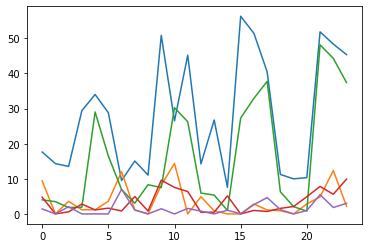

In [51]:
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4
num_time_points = 25

fig, ax = plt.subplots()
ax.plot(np.transpose(lpr_filtered_data_minute.iloc[10:15,time_index_start:time_index_start + num_time_points].values));

In [52]:
delta_mov_auc = lpr_filtered_data_minute[['chemical.id', 'conc', 'plate.id', 'well']].copy()
transition_points = [2]
num_light = 3
num_dark = 3
for transition_index, transition_point in enumerate(transition_points):
    delta_mov_auc['MOV' + str(transition_index + 1)] = lpr_filtered_data_minute['t' + str(transition_point + 1)] - lpr_filtered_data_minute['t' + str(transition_point)]
    delta_mov_auc['AUC' + str(transition_index + 1)] = sum(lpr_filtered_data_minute['t' + str(transition_point + 1 + index_count)] for index_count in range(num_dark)) - sum(lpr_filtered_data_minute['t' + str(transition_point - index_count)] for index_count in range(num_light))
    
display(delta_mov_auc.head())  

,chemical.id,conc,plate.id,well,MOV1,AUC1
0,3756,100.0,20544,A02,5.768000,2.973000
1,3756,100.0,20544,A04,0.000000,-8.591000
2,3756,100.0,20544,A05,0.000000,-5.314000
3,3756,100.0,20544,A06,11.183001,119.306001
4,3756,100.0,20544,A08,0.000000,0.000000


In [53]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
0,3756,100.0,20544,A02,5.768000,2.973000
1,3756,100.0,20544,A04,0.000000,-8.591000
2,3756,100.0,20544,A05,0.000000,-5.314000
3,3756,100.0,20544,A06,11.183001,119.306001
4,3756,100.0,20544,A08,0.000000,0.000000


In [54]:
display(delta_mov_auc.tail())

,Chemical.ID,CONC,Plate,WELL,MOV1,AUC1
218,3756,0.0,20625,H08,72.797001,152.687001
219,3756,0.0,20625,H09,44.154000,111.708001
220,3756,0.0,20625,H10,1.658000,-8.936000
221,3756,0.0,20625,H11,185.143001,425.651002
222,3756,0.0,20625,H12,79.032000,291.573999


In [55]:
import generate_dose_response_newest_no_avg as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [60]:
start_time = time.time()

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

#full_devel = "full"
full_devel = "devel"

end_points = ['MOV1','AUC1']

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
else:
    chemical_id_from_here = [3756]
    
for chemical_id in chemical_id_from_here:
    print("chemical_id:" + str(chemical_id))
    for end_point in end_points:
        print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# for all combinations of 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()

chemical_id:3756
end_point:MOV1
delta_mov_auc_end_point_chemical_id:
     Chemical.ID   CONC  Plate WELL        MOV1
0           3756  100.0  20544  A02    5.768000
1           3756  100.0  20544  A04    0.000000
2           3756  100.0  20544  A05    0.000000
3           3756  100.0  20544  A06   11.183001
4           3756  100.0  20544  A08    0.000000
..           ...    ...    ...  ...         ...
218         3756    0.0  20625  H08   72.797001
219         3756    0.0  20625  H09   44.154000
220         3756    0.0  20625  H10    1.658000
221         3756    0.0  20625  H11  185.143001
222         3756    0.0  20625  H12   79.032000

[223 rows x 5 columns]
type(delta_mov_auc_end_point_chemical_id):
<class 'pandas.core.frame.DataFrame'>
type(end_point):
<class 'str'>
dose_response:
     dose  num_affect  num_embryos
0    0.00         3.0         30.0
1    2.16         3.0         33.0
2    6.80        10.0         30.0
3   14.70         6.0         28.0
4   31.60         3.0        

In [39]:
np.exp((np.log(0.1/(1-0.1)) - 0.00088637)/0.03373856)

5.071672098544112e-29